# Starter

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# In case of OSError: [Errno 107] Transport endpoint is not connected, restart Kernel

FOLDERNAME = 'SBIR'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


# this changes the working directory to the folder, and allows us to perform version control operations
%cd drive/My\ Drive/$FOLDERNAME
!git config --global user.email "arjun2000ashok@gmail.com"
!git config --global user.name "Arjun Ashok"



import matplotlib.pyplot as plt
import torch
import os
import glob
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

from PIL import Image
from io import BytesIO
%matplotlib inline

%load_ext autoreload
%autoreload 2
!pip install wandb -qq
import wandb
!wandb login 28f856e56e11e0b499f7b141ce1d61b0a6671e97

!git log -3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/SBIR
     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 122kB 16.4MB/s 
     |████████████████████████████████| 163kB 12.5MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
wandb: Appending key for api.wandb.ai to your netr

In [2]:
# ONLY IN COLAB


!mkdir ../../../Sketchy
!unzip -qq data/Sketchy.zip -d ../../../Sketchy
!cp data/test_embeddings.npy ../../../Sketchy/test_embeddings.npy
!cp data/train_embeddings.npy ../../../Sketchy/train_embeddings.npy

# Git commit and push

In [ ]:
# !git reset --soft HEAD~1 # UNDO PREVIOUS COMMIT AND PUT THOSE FILES IN STAGING AREA
# !git status # - VIEW STAGED, UNTRACKED FILES
# !git reset HEAD -- . # - TO UNSTAGE FILES
!git log # LOG

In [ ]:
!git add .
!git commit -m 'Init switch to baseline, to put SAE'
!git push -u origin master

[baseline 9f3d7ba] Init switch to baseline, to put SAE
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite sbir.ipynb (94%)
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


In [ ]:
# !git stash
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
From https://github.com/aiarjun/Sketch-Based-Image-Retrieval
   73bc9d3..a649f1a  master     -> origin/master
Updating 73bc9d3..a649f1a
Fast-forward
 README.md | 13 ++++++++++++-
 test.csv  |  3 ---
 train.py  |  2 +-
 3 files changed, 13 insertions(+), 5 deletions(-)
 delete mode 100644 test.csv


# Reading and writing embedding files

## GloVe

https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76

In [ ]:
!wget http://nlp.stanford.edu/data/wordvecs/glove.6B.zip -P ../../../

--2020-08-21 16:02:09--  http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.6B.zip [following]
--2020-08-21 16:02:09--  https://nlp.stanford.edu/data/wordvecs/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip [following]
--2020-08-21 16:02:10--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [applic

In [ ]:
!unzip ../../../glove.6B.zip -d ../../../glove/

Archive:  ../../../glove.6B.zip
replace ../../../glove/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
%pip install bcolz
import bcolz
import pickle
import numpy as np

glove_path = '../../../glove'
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.300.dat', mode='w')

with open(f'{glove_path}/glove.6B.300d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400001, 300)), rootdir=f'{glove_path}/6B.300.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'{glove_path}/6B.300_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'{glove_path}/6B.300_idx.pkl', 'wb'))

In [ ]:
vectors = bcolz.open(f'{glove_path}/6B.300.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.300_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.300_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [ ]:
glove['the'].shape

(300,)

In [ ]:
import os

def get_embeddings(labels):
    embeddings = []
    for label in labels:
        embeddings.append(np.array(glove[label]))
    embeddings = np.array(embeddings)  
    return embeddings

data_dir = ''

train_labels = open(os.path.join(data_dir, 'train_labels.txt')).read().splitlines() 
test_labels = open(os.path.join(data_dir, 'test_labels.txt')).read().splitlines() 

train_embeddings = get_embeddings(train_labels)
test_embeddings = get_embeddings(test_labels)

np.save(os.path.join(data_dir, 'train_embeddings.npy'), train_embeddings)
np.save(os.path.join(data_dir, 'test_embeddings.npy'), test_embeddings)

In [ ]:
train_embeddings = np.load(os.path.join(data_dir, 'train_embeddings.npy'))
test_embeddings = np.load(os.path.join(data_dir, 'test_embeddings.npy'))
display(train_embeddings.shape, test_embeddings.shape)

(52, 300)

(11, 300)

## Word2Vec

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300") 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def get_embeddings(labels):
    embeddings = []
    for label in labels:
        embeddings.append(np.array(glove[label]))
    embeddings = np.array(embeddings)  
    return embeddings

data_dir = '../../../Sketchy'

train_labels = open(os.path.join(data_dir, 'train_labels.txt')).read().splitlines() 
test_labels = open(os.path.join(data_dir, 'test_labels.txt')).read().splitlines() 

train_embeddings = get_embeddings(train_labels)
test_embeddings = get_embeddings(test_labels)

np.save(os.path.join(data_dir, 'train_embeddings.npy'), train_embeddings)
np.save(os.path.join(data_dir, 'test_embeddings.npy'), test_embeddings)

# Testing the dataloader module

In [ ]:
from model.dataloader import Dataloaders
dataloaders = Dataloaders(data_dir = '../../../Sketchy/')
train_dict = {v:k for k,v in dataloaders.train_dict.items()}; test_dict= {v:k for k,v in dataloaders.test_dict.items()};

## Train - triplets

In [ ]:
train_dataloader = dataloaders.get_train_dataloader(batch_size = 1, shuffle = True)

crocodilian
candle


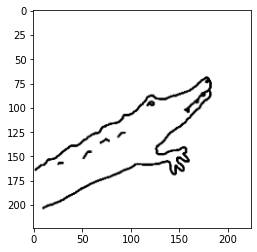

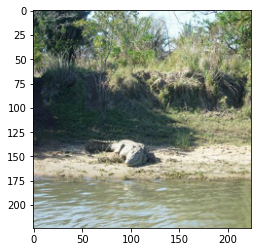

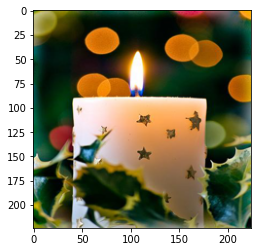

In [ ]:
iterator = iter(train_dataloader)
batch = next(iterator)

anchors, positives, negatives, embeds, label_idxs, neg_label_idxs = batch
idx = 0


print(train_dict[label_idxs[idx].cpu().item()])
plt.figure()
plt.imshow(np.transpose(anchors[idx].cpu().numpy(),(1,2,0)))

plt.figure()
plt.imshow(np.transpose(positives[idx].cpu().numpy(),(1,2,0)))

print(train_dict[neg_label_idxs[idx].cpu().item()])
plt.figure()
plt.imshow(np.transpose(negatives[idx].cpu().numpy(),(1,2,0)))

## Test - sketches and images

In [ ]:
test_dataloader_sketches = dataloaders.get_test_dataloader(batch_size = 4, section = 'sketches', shuffle = True)

sword


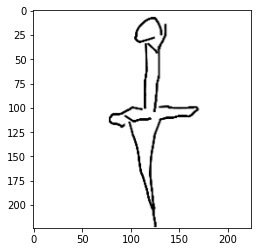

In [ ]:
batch = next(iter(test_dataloader_sketches))
images, label_idxs = batch
idx = 1

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))
print(test_dict[label_idxs[idx].cpu().item()])

In [ ]:
test_dataloader_images = dataloaders.get_test_dataloader(batch_size = 4, section = 'photos', shuffle = True)

sword


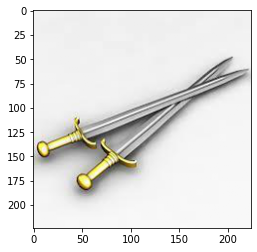

In [ ]:
batch = next(iter(test_dataloader_images))
images, label_idxs = batch
idx = 3

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))

print(test_dict[label_idxs[idx].cpu().item()])

# Training

In [15]:
checkpoint = None

start_epoch = 0
num_epochs = 1
triplet_loss_ratio = 1

batch_size = 16
test_batch_size = 8
print_every = 30
learning_rate = 3e-4
save_to_cloud_every = 5
checkpoint_dir = 'experiments'

wandb.init(project="SBIR")
config = wandb.config      
config.batch_size = batch_size          
config.test_batch_size = test_batch_size
config.epochs = num_epochs            
config.lr = learning_rate  
config.print_every = print_every
config.start_epoch = start_epoch
config.triplet_loss_ratio = triplet_loss_ratio
config.save_to_cloud_every = save_to_cloud_every
config.checkpoint_dir = checkpoint_dir


from train import Trainer
trainer = Trainer('../../../Sketchy/')
trainer.train_and_evaluate(config, checkpoint)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


Training...
2020-09-01 14:47:08+05:30 Epoch: 0 [0 / 199] ; eta: 0:05:39
Average Triplet loss: 4.121659(4.121659);


KeyboardInterrupt: ignored

# Cache features to disk

In [ ]:
from model.dataloader_2 import Dataloaders
from model.net import BasicModel
from cache import evaluate

image_model = BasicModel()
sketch_model = BasicModel()
dataloaders2 = Dataloaders('../../../Sketchy')

idf, skdf, simdf = evaluate(8, dataloaders2, image_model, sketch_model, dataloaders2.test_dict) 
idf.to_csv('images_label_path.csv', index=False, header = False)
skdf.to_csv('sketches_label_path.csv', index=False, header = False)
simdf.to_csv('similarity.csv', index=False, header = False)

# Evaluation

Change the model according to the config used in that run

In [ ]:
wandb.init(id='3pj96kvk', project='SBIR')
checkpoint_name = wandb.restore('last_state_.pth.tar').name

Streaming file created twice in same run: /content/drive/My Drive/SBIR/wandb/run-20200826_100535-3pj96kvk/wandb-events.jsonl
Streaming file created twice in same run: /content/drive/My Drive/SBIR/wandb/run-20200826_100535-3pj96kvk/wandb-history.jsonl


In [ ]:
!python evaluate.py --model wandb/run-20200826_100535-3pj96kvk/last_state_.pth.tar --data ../../../Sketchy/ --batch_size 4 --num_sketches 2 --num_images 5 --output_dir ../../../outputs

Loading the models from the end of net iteration 7751
Processing the images. Batch size: 4; Number of batches: 219
Processed the images. Time taken: 0:00:12
Processing the sketches. Batch size: 4; Number of batches: 303
Processed the sketches. Time taken: 0:00:16
Class: pizza, mAP: 0.990458
Class: sword, mAP: 0.898759
Average test mAP:  0.944646482032573


# For SBIR

* We need to map sketch features to image features

* That is, at the end we wil have (1024, m) sketches and (1024, m) images(which were taken at random). We can form a mapping from sketches to images through $V$ as

* The objective is to estimate $V$ of dimension $1024 x 1024$ that minimizes

$$||X_SW - X_I||^2 + \gamma||X_I*W^T||^2 + \lambda||X_SW||^2 + \beta||W||^2$$

* i.e. map from the sketch features to the image features, while maintaining the sparsity of $W$ and keeping the mapping of sketch features/image features in control.

* Hyperparameter search should be done

# Closed form solution

$$W = (X*X^T + \gamma I)^{-1} XYS^T (SS^T + \gamma I)^{-1}$$

where 

$X$ is (1024, 50000)

I is (1024, 1024)

Y is (50000, 1024) 

S is (300, 20) ---> this is Word2Vec representaton?
